# Udacity Project: Investigate a Dataset
## FBI Firearm Data Compared to US census Data
---

#### Ethan Coolidge | Intro to Data Analysis | Western Govenors University


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

For this project I chose the FBI gun dataset. The project input consist of two files. One is from NICS that contains national data about backround checks. The other is US census data for dates coressponding around April 2010 and July 2016. 

The NICS data does not record all gun purchases; just recoreded backround checks. Since state firearm laws vary, this could, and most likely create bias with in the data. Regardless, the NICS gun data is considered the stadard for firearm analysis and research [Cite](https://github.com/BuzzFeedNews/nics-firearm-background-checks/blob/master/README.md).

The questions that I have formed from this dataset are:

>What is the general growth of firearm checks in corelation to popluation growth?

>What is the correlation of age groups and firearms checks?

Now, I would not be suprised if there is positive correlation betwen population growth and firearm purchases. Many other items would also have a positive correlation as well, like calculators and cooking pots. But I want to know how strong the correlation between population and firearms is. Does the correlaton rise at the same rate or is it drasticaly different. I could be wrong and the correlation is accualy negative indicating the firearms are not as popular as there once where.

I aslo interested in which states have the highest and lowest firearm proportion to population and have the highest and lowest growth firearm growth rates over all. This information might be useful to a person I letting firearm stats help weigh there desicion on moving to one state verses another. Maybe they love nature and would enjoy a quite atmosphere.
Or they could be a '*Fire Stick*' lover and want to live near all the other *Fire Stick* lovers.

Age group is an important correlation to test. I would like to see if age does play a role in firearm proportions. With my census data it has percentages for population under 18 and over 65. Does haveing more children influence the purchaces of guns? How much does the retired age group indulge in purchasing a gun? 

These questions can help me, and others, better understand the dichotomy of present day American society in its relation to firearms.

For the first question I conducted some general states on the gun data alone, find the mean, inquartile ranges, and ect. I then introduced the population data to create comparisons with growth rate and firearm proportion to population.

For the second question I simply created some scatter plots to gain a more visial view of what my data was showing

In [31]:
# import special packages for analysis and graphs
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
 
# add some style to the graphs
sns.set_style('darkgrid')



<a id='wrangling'></a>
## Data Wrangling

> To wrangle my data, I am going to start by uploading it and exploring its general structure. I have viewed the data in a spreadsheet to get a bigger picture, but still nead to obtain a feal for how my code my needs to handle the data and if there othere problems that I need to address that I did not see before.

>Next, I will wraggle the data into a more user friendly and extract the data that is relevent to my questions.
***
### General Properties


In [68]:
# load census data from csv file
df_c = pd.read_csv('U.S. Census Data.csv', header=None)

# load fbi gun data from Exel file
df_g = pd.read_excel('gun_data.xlsx')


To explore the raw data I will begin by looking at the top, the bottom, the shape (number of rows and columns), and the the column datatypes of the datasets. I will begin with the census data, give an anlysis of it, and then do the same for the fbi gun data.

#### Census data properties


In [45]:
# check the top of the table
df_c.head()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
1,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
2,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
3,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
4,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"


In [4]:
# check the bottom
df_c.tail()

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
81,FN,Footnote on this item in place of data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,NaN,Not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# data shape and size
df_c.shape

(86, 52)

In [46]:
# column data types
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 52 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       81 non-null     object
 1   1       29 non-null     object
 2   2       66 non-null     object
 3   3       66 non-null     object
 4   4       66 non-null     object
 5   5       66 non-null     object
 6   6       66 non-null     object
 7   7       66 non-null     object
 8   8       66 non-null     object
 9   9       66 non-null     object
 10  10      66 non-null     object
 11  11      66 non-null     object
 12  12      66 non-null     object
 13  13      66 non-null     object
 14  14      66 non-null     object
 15  15      66 non-null     object
 16  16      66 non-null     object
 17  17      66 non-null     object
 18  18      66 non-null     object
 19  19      66 non-null     object
 20  20      66 non-null     object
 21  21      66 non-null     object
 22  22      66 non-null     obje

***
#### Census Data Overview
I can immedialty see that I have major problems with the census data. To begin, I think it is the wrong direction; rows and columns need to be flipped. The decription info on the side will be turned into the headers and the states can all share there own column. This will assist me in changing the datatypes from those ojects to numeric which I can run computations on and pull graphs from.

There is a preponderance of null values at the bottom of the table. These need to be removed since those row are of little use with nulls.

I also noticed that center data changes format and then reverts back (see columns 42-44 above). This swath of data will need have special treatment to ensure that all the percentages follow the same format.

When I have wrangled the table I will reaccess to see what columns will nead.

***

#### FBI Gun Data Properties

In [7]:
# check the top
df_g.head()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [8]:
# check the bottom
df_g.tail()

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
12480,1998-11,Virginia,0.0,NaN,14.0,2.0,NaN,8,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24
12481,1998-11,Washington,1.0,NaN,65.0,286.0,NaN,8,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,361
12482,1998-11,West Virginia,3.0,NaN,149.0,251.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,408
12483,1998-11,Wisconsin,0.0,NaN,25.0,214.0,NaN,2,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241
12484,1998-11,Wyoming,8.0,NaN,45.0,49.0,NaN,5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,107


In [10]:
# check shape and size
df_g.shape

(12485, 27)

In [36]:
# check datatypes
df_g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   month                      12485 non-null  object 
 1   state                      12485 non-null  object 
 2   permit                     12461 non-null  float64
 3   permit_recheck             1100 non-null   float64
 4   handgun                    12465 non-null  float64
 5   long_gun                   12466 non-null  float64
 6   other                      5500 non-null   float64
 7   multiple                   12485 non-null  int64  
 8   admin                      12462 non-null  float64
 9   prepawn_handgun            10542 non-null  float64
 10  prepawn_long_gun           10540 non-null  float64
 11  prepawn_other              5115 non-null   float64
 12  redemption_handgun         10545 non-null  float64
 13  redemption_long_gun        10544 non-null  flo

***
#### FBI Gun Data Overview

Overall, the FBI gun data is relatively clean. The columns have a neat header and the datatypes are proper, save for the data which I may need to change to date format. But still have some issues.

I nead data for the years 2010 and 2016 to conduct my analysis. I need the data for year around and not the month format that the table is in. I will nead to sum the data for the desired years grouped by state to properaly conduct my analysis.

As for the null values on the bottom, there are all in columns that I am going to drop. I only want the totals, long-gun, handgun, state, and month data. If any nulls appear in my kept data, I will deal with them using statistical methods.

***


### Data Cleaning

>In the cleaning process one will notice that I increment the dataframe varible every so often.
I call these my checkpoints. Theses will save the data at several stages of the cleaning. This prevents bad code from corrupting the whole data set, causing me reload the raw data. I real life this can useful if I want to pull data from a certain cleaning point to conduct a different analysis later on.

#### Cleaning the Census data
I start cleaning the census data by removing the null rows and then flip the table on its side. This will provide a better angle to work with. To drop the nulls I will have to remove the second columns first. It is random data and full of null. If not removed It will drop neaded rows that have nulls in it.


In [69]:
# checkpoint
df_c1=df_c.copy()
# remove second columns
df_c1 = df_c1.drop(df_c.columns[[1]], axis=1)
df_c1.head(1)

,0,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
0,Fact,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming


In [81]:
# remove nulls
df_c2 = df_c1.dropna()
df_c2.tail()

,0,2,3,4,5,6,7,8,9,10,...,42,43,44,45,46,47,48,49,50,51
61,"Veteran-owned firms, 2012","41,943","7,953","46,780","25,915","252,377","51,722","31,056","7,206","185,756",...,8604,59379,"213,590","18,754","8,237","76,434","49,331","12,912","39,830","6,470"
62,"Nonveteran-owned firms, 2012","316,984","56,091","427,582","192,988","3,176,341","469,524","281,182","60,318","1,846,686",...,66219,469392,"2,057,218","219,807","63,317","548,439","461,401","94,960","370,755","51,353"
63,"Population per square mile, 2010",94.4,1.2,56.3,56,239.1,48.5,738.1,460.8,350.6,...,10.7,153.9,96.3,33.6,67.9,202.6,101.2,77.1,105,5.8
64,"Land area in square miles, 2010","50,645.33","570,640.95","113,594.08","52,035.48","155,779.22","103,641.89","4,842.36","1,948.54","53,624.76",...,75811,41234.9,"261,231.71","82,169.62","9,216.66","39,490.09","66,455.52","24,038.21","54,157.80","97,093.14"
65,FIPS Code,"""01""","""02""","""04""","""05""","""06""","""08""","""09""","""10""","""12""",...,"""46""","""47""","""48""","""49""","""50""","""51""","""53""","""54""","""55""","""56"""


In [83]:
# checkpoint
df_c3 = df_c2.copy()
#flip the table
df_c4 = df_c3.transpose()
df_c4.head(3)

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Population, percent change - April 1, 2010 (es...","Population, Census, April 1, 2010","Persons under 5 years, percent, July 1, 2016, ...","Persons under 5 years, percent, April 1, 2010","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...",...,"All firms, 2012","Men-owned firms, 2012","Women-owned firms, 2012","Minority-owned firms, 2012","Nonminority-owned firms, 2012","Veteran-owned firms, 2012","Nonveteran-owned firms, 2012","Population per square mile, 2010","Land area in square miles, 2010",FIPS Code
2,Alabama,"4,863,300","4,780,131",1.70%,"4,779,736",6.00%,6.40%,22.60%,23.70%,16.10%,...,"374,153","203,604","137,630","92,219","272,651","41,943","316,984",94.4,"50,645.33","""01"""
3,Alaska,"741,894","710,249",4.50%,"710,231",7.30%,7.60%,25.20%,26.40%,10.40%,...,"68,032","35,402","22,141","13,688","51,147","7,953","56,091",1.2,"570,640.95","""02"""


***
*Nice!* The data is looking more like what I want. Now I need to drop all the uneaded columns.
Because there is already census data for 2010, I will not nead to the popluation est for 2010 on column 2. Column 3 will also go because it depends on column 2.

I also nead to replace that 'Fact' row with a more meaningful header.

In [93]:
# checkpoint
df_c5 = df_c4.copy()

# drop uneaded rows
df_c6 = df_c5.drop(df_c5.iloc[:, np.r_[3,4,5,6, 11:66]], axis = 1)
df_c6.head()

,0,1,2,7,8,9,10
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010"
2,Alabama,"4,863,300","4,780,131",22.60%,23.70%,16.10%,13.80%
3,Alaska,"741,894","710,249",25.20%,26.40%,10.40%,7.70%
4,Arizona,"6,931,071","6,392,301",23.50%,25.50%,16.90%,13.80%
5,Arkansas,"2,988,248","2,916,025",23.60%,24.40%,16.30%,14.40%


In [94]:
# create columns
columns = ['state', 'pop_est_2016', 'pop_census_2010', 'pop<18_%_2016', 'pop<18_%_2010', 'pop>65_%_2016', 'pop>65_%_2010']
# add header
df_c6.columns = columns
df_c6.head()

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
0,Fact,"Population estimates, July 1, 2016, (V2016)","Population estimates base, April 1, 2010, (V2...","Persons under 18 years, percent, July 1, 2016,...","Persons under 18 years, percent, April 1, 2010","Persons 65 years and over, percent, July 1, 2...","Persons 65 years and over, percent, April 1, 2010"
2,Alabama,"4,863,300","4,780,131",22.60%,23.70%,16.10%,13.80%
3,Alaska,"741,894","710,249",25.20%,26.40%,10.40%,7.70%
4,Arizona,"6,931,071","6,392,301",23.50%,25.50%,16.90%,13.80%
5,Arkansas,"2,988,248","2,916,025",23.60%,24.40%,16.30%,14.40%


In [97]:
# remove first row containg column info
df_c7 = df_c6.drop(df_c6.index[0], axis = 0)
df_c7.head()

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
2,Alabama,"4,863,300","4,780,131",22.60%,23.70%,16.10%,13.80%
3,Alaska,"741,894","710,249",25.20%,26.40%,10.40%,7.70%
4,Arizona,"6,931,071","6,392,301",23.50%,25.50%,16.90%,13.80%
5,Arkansas,"2,988,248","2,916,025",23.60%,24.40%,16.30%,14.40%
6,California,"39,250,017","37,254,522",23.20%,25.00%,13.60%,11.40%


***
*Now*, ai'nt that purdy!

I still nead to change the datatypes.

In [98]:
df_c7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            50 non-null     object
 1   pop_est_2016     50 non-null     object
 2   pop_census_2010  50 non-null     object
 3   pop<18_%_2016    50 non-null     object
 4   pop<18_%_2010    50 non-null     object
 5   pop>65_%_2016    50 non-null     object
 6   pop>65_%_2010    50 non-null     object
dtypes: object(7)
memory usage: 3.1+ KB


Because of the fun nature of these columns I an going to create some special python function to speed of the datatype transformation.

In [102]:
def str_num1_func(df, columnN):
    '''Take string covert to numeric'''
    #df argument is the dataframe
    #columnN is the column name text
    
    #convert string to numeric
    df[columnN] = pd.to_numeric(df[columnN], errors='ignore')

# function to extranct numeric from string by removing comma
def str_num2_func(df, columnN):
    '''Strip string of commas. Take string covert to numeric'''
    #df argument is the dataframe
    #columnN is the column name text
    
    # remove commas from string
    df[columnN] = df[columnN] = df[columnN] = df[columnN].replace(',','', regex=True)
    # transform string to numeric
    str_num1_func(df, columnN)

# function to extract numeric from from string by removing %
def str_num3_func(df, columnN):
    '''Strip string of %. Take string covert to numeric'''
    #df argument is the dataframe
    #columnN is the column name text
    
    # remove % from string
    df[columnN] = df[columnN] = df[columnN] = df[columnN].replace('%','', regex=True)
    # transform string to numeric
    df[columnN] = df[columnN] = pd.to_numeric(df[columnN], errors='ignore')

# check functions
print('Check docstrings')
print(str_num1_func.__doc__)
print(str_num2_func.__doc__)
print(str_num3_func.__doc__)

Check docstrings
Take string covert to numeric
Strip string of commas. Take string covert to numeric
Strip string of %. Take string covert to numeric


***
#### Now . . . I transform!
![Image](http://www.clipartbest.com/cliparts/dT7/ek5/dT7ek5BLc.png)
[Picture Source](http://www.clipartbest.com/cliparts/dT7/ek5/dT7ek5BLc.png)

In [105]:
#checkpoint
df_c8=df_c7.copy()

#transform column datatypes
str_num2_func(df_c8, 'pop_est_2016')
str_num2_func(df_c8, 'pop_census_2010')
str_num3_func(df_c8, 'pop<18_%_2016')
str_num3_func(df_c8, 'pop<18_%_2010')
str_num3_func(df_c8, 'pop>65_%_2016')
str_num3_func(df_c8, 'pop>65_%_2010')

df_c8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 2 to 51
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   state            50 non-null     object 
 1   pop_est_2016     50 non-null     int64  
 2   pop_census_2010  50 non-null     int64  
 3   pop<18_%_2016    50 non-null     float64
 4   pop<18_%_2010    50 non-null     float64
 5   pop>65_%_2016    50 non-null     float64
 6   pop>65_%_2010    50 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ KB


***WOW!*** That was cool.

***

I now need to change that inconsistand data in the center.

In [116]:
#checkpoint
df_c9=df_c8.copy()

# locate upper region
df_c9.iloc[28:32]

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
30,New Hampshire,1334795,1316461,19.500,21.800,17.000,13.500
31,New Jersey,8944469,8791953,22.200,23.500,15.300,13.500
32,New Mexico,2081015,2059198,0.236,0.252,0.165,0.132
33,New York,19745289,19378110,0.212,0.223,0.154,0.135


In [117]:
# find lower region
df_c9.iloc[40:44]

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
42,South Dakota,865454,814195,0.246,0.249,0.160,0.143
43,Tennessee,6651194,6346298,0.226,0.236,0.157,0.134
44,Texas,27862596,25146100,26.200,27.300,12.000,10.300
45,Utah,3051217,2763888,30.200,31.500,10.500,9.000


***
I seems that I nead to treat the date from row 30 to 41 (the index is off) for the fourth to seventh columns.
I will do this by multiplying the inconsistant data by 100 to turn in to a percentage from a point decimal.

In [118]:
# treat the region
df_c9.iloc[30:42, 3:]=df_c9.iloc[30:42, 3:].mul(100)
# check treatment
df_c9.iloc[28:34]

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
30,New Hampshire,1334795,1316461,19.5,21.8,17.0,13.5
31,New Jersey,8944469,8791953,22.2,23.5,15.3,13.5
32,New Mexico,2081015,2059198,23.6,25.2,16.5,13.2
33,New York,19745289,19378110,21.2,22.3,15.4,13.5
34,North Carolina,10146788,9535688,22.7,23.9,15.5,12.9
35,North Dakota,757952,672591,23.3,22.3,14.5,14.5


***
*Fabulous!* The census data is cleaned and ready for use.
I will save the changes to a seperate csv file and reload it.

In [120]:
# save clean data
df_c9.to_csv('census_data_clean.csv', index=False)

# reload file
df_pop = pd.read_csv('census_data_clean.csv')

# display top
df_pop.head(3)

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010
0,Alabama,4863300,4780131,22.6,23.7,16.1,13.8
1,Alaska,741894,710249,25.2,26.4,10.4,7.7
2,Arizona,6931071,6392301,23.5,25.5,16.9,13.8


***

#### Cleaning the FBI Gun Data

The gun data cleaning my not be as spactacular, but it is just as important. I need to remove the uneaded columns and then query for the years of 2010 and 2016. To conduct to query I will need to convert the month columns to a date format. The I try to sum the states with a group by, extracting the year round data.

In [133]:
# checkpoint
df_g1=df_g.copy()

# show table for reference
df_g.head(1)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019


In [134]:
# drop columns
df_g2 = df_g1.drop(df_g.iloc[:, np.r_[2,3, 6:26]], axis=1)
df_g2.head(1)

,month,state,handgun,long_gun,totals
0,2017-09,Alabama,5734.0,6320.0,32019


In [135]:
# change month data type
df_g2.month=pd.to_datetime(df_g2.month)
df_g2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12485 entries, 0 to 12484
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   month     12485 non-null  datetime64[ns]
 1   state     12485 non-null  object        
 2   handgun   12465 non-null  float64       
 3   long_gun  12466 non-null  float64       
 4   totals    12485 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 487.8+ KB


In [132]:
df_g2.head()

,month,state,handgun,long_gun,totals
0,2017-09-01,Alabama,5734.0,6320.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,17747
4,2017-09-01,California,37165.0,24581.0,123506


***
Changing the monthdata time added a *-01* to the end of all my dates. This will not affect the anlysis becuase I am going to create to data set to each year, and the remove the month.

Let's query the data we need.

In [169]:
# checkpoint
df_g3=df_g2.copy()

#query 2010
df_10 = df_g3.query('month < "2011-01-01" and month > "2009-12-01"');
df_10


,month,state,handgun,long_gun,totals
4455,2010-12-01,Alabama,13978.0,24298.0,43266
4456,2010-12-01,Alaska,2553.0,3950.0,7036
4457,2010-12-01,Arizona,9943.0,9814.0,23942
4458,2010-12-01,Arkansas,5816.0,12455.0,23821
4459,2010-12-01,California,24519.0,32100.0,81522
...,...,...,...,...,...
5110,2010-01-01,Virginia,11513.0,10323.0,22145
5111,2010-01-01,Washington,9348.0,8287.0,27184
5112,2010-01-01,West Virginia,3735.0,4860.0,11693
5113,2010-01-01,Wisconsin,4382.0,7950.0,12734


In [170]:
# group data
col=['handgun','long_gun','totals']
df_10a=df_10.groupby(['state'])[col].sum().reset_index()
df_10a.head()

,state,handgun,long_gun,totals
0,Alabama,116963.0,136519.0,308607
1,Alaska,25720.0,33177.0,65909
2,Arizona,89162.0,69067.0,206050
3,Arkansas,49992.0,72206.0,191448
4,California,245159.0,275458.0,816399


In [171]:
# check from earlier data
df_g3.head(5)

,month,state,handgun,long_gun,totals
0,2017-09-01,Alabama,5734.0,6320.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,17747
4,2017-09-01,California,37165.0,24581.0,123506


***

The 2010 data is grouped nicely. I now need to suffic the labels so that I can merge to this and the next gun data set together. Because rename the labesl twice I am goin to create a function for the process.

In [172]:
def lable_chg_func(df, tag):
    '''Tack column lable add tag'''
    
    # df is the designated dataframe
    # tag is the text string the will suffix the lables    
    df=df
    tag=tag
    # create containter to hold lables
    new_col = []
    
    # loop through columns and tag the lables
    for c in df.columns:
        new_col.append(c + tag)
    # change df header    
    df.columns = new_col

# check function    
print("Check docstring")
print(lable_chg_func.__doc__)

Check docstring
Tack column lable add tag


***
Lets try out the new function.

In [173]:
# create checkpoint
df_10b=df_10a.copy()

# suffix 2010 data
lable_chg_func(df_10b, '_2010')

# check lables
df_10b.head(0)

,state_2010,handgun_2010,long_gun_2010,totals_2010


***
*Beautiful!* Let's repeat the process for the 2016 data.

In [177]:
#query 2016
df_16 = df_g3.query('month < "2017-01-01" and month > "2015-12-01"');
df_16

,month,state,handgun,long_gun,totals
495,2016-12-01,Alabama,13733.0,17519.0,62014
496,2016-12-01,Alaska,4087.0,3698.0,8786
497,2016-12-01,Arizona,18024.0,13785.0,44887
498,2016-12-01,Arkansas,9192.0,13433.0,29926
499,2016-12-01,California,63649.0,93224.0,298161
...,...,...,...,...,...
1150,2016-01-01,Virginia,27033.0,15699.0,44181
1151,2016-01-01,Washington,20427.0,11355.0,58050
1152,2016-01-01,West Virginia,7419.0,5505.0,18985
1153,2016-01-01,Wisconsin,17969.0,10756.0,39561


In [179]:
# group data
col=['handgun','long_gun','totals']
df_16a=df_16.groupby(['state'])[col].sum().reset_index()
df_16a.head()

,state,handgun,long_gun,totals
0,Alabama,153123.0,121963.0,616947
1,Alaska,37491.0,36887.0,87647
2,Arizona,166784.0,108988.0,416279
3,Arkansas,80244.0,82120.0,266014
4,California,560355.0,554550.0,2377167


In [180]:
# check from earlier data
df_g3.head(5)

,month,state,handgun,long_gun,totals
0,2017-09-01,Alabama,5734.0,6320.0,32019
1,2017-09-01,Alaska,2320.0,2930.0,6303
2,2017-09-01,Arizona,11063.0,7946.0,28394
3,2017-09-01,Arkansas,4347.0,6063.0,17747
4,2017-09-01,California,37165.0,24581.0,123506


In [181]:
# create checkpoint
df_16b=df_16a.copy()

# suffix 2016 data
lable_chg_func(df_16b, '_2016')

# check lables
df_16b.head(0)

,state_2016,handgun_2016,long_gun_2016,totals_2016


***
That is beautiful.

I now have to merge the gun datasets into one, which will do with an inner join linked by state.

In [220]:
#merge gun data for years 2010 and 2016
df_gm = df_10b.merge(df_16b, left_on='state_2010', right_on='state_2016', how='inner')
df_gm.head(2)

,state_2010,handgun_2010,long_gun_2010,totals_2010,state_2016,handgun_2016,long_gun_2016,totals_2016
0,Alabama,116963.0,136519.0,308607,Alabama,153123.0,121963.0,616947
1,Alaska,25720.0,33177.0,65909,Alaska,37491.0,36887.0,87647


***

I now need to remove one those state columns.

In [221]:
# drop state 2016 column
df_gm=df_gm.drop(df_gm.columns[[4]], axis=1)

#check change
df_gm.head(1)

,state_2010,handgun_2010,long_gun_2010,totals_2010,handgun_2016,long_gun_2016,totals_2016
0,Alabama,116963.0,136519.0,308607,153123.0,121963.0,616947


***
This is ready cleaned and read for the final stage of the wragling.

I will now save the dataset to a csv and reload it.

In [222]:
# save to csv
df_gm.to_csv('gun_data_2010_2016_clean.csv', index=False)

# reload the dataset
df_gun=pd.read_csv('gun_data_2010_2016_clean.csv')

# diplay top
df_gun.head()

,state_2010,handgun_2010,long_gun_2010,totals_2010,handgun_2016,long_gun_2016,totals_2016
0,Alabama,116963.0,136519.0,308607,153123.0,121963.0,616947
1,Alaska,25720.0,33177.0,65909,37491.0,36887.0,87647
2,Arizona,89162.0,69067.0,206050,166784.0,108988.0,416279
3,Arkansas,49992.0,72206.0,191448,80244.0,82120.0,266014
4,California,245159.0,275458.0,816399,560355.0,554550.0,2377167


***
#### The Big Merge

Both datafiles have been cleaned and wrangled.

I now am going to merge them both into one grand dataframe that I will condunct my analysis on.

In [228]:
# merge census and gun data
df_dm=df_pop.merge(df_gun, left_on='state', right_on='state_2010', how='inner')

# check merge
df_dm.head()

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010,state_2010,handgun_2010,long_gun_2010,totals_2010,handgun_2016,long_gun_2016,totals_2016
0,Alabama,4863300,4780131,22.6,23.7,16.1,13.8,Alabama,116963.0,136519.0,308607,153123.0,121963.0,616947
1,Alaska,741894,710249,25.2,26.4,10.4,7.7,Alaska,25720.0,33177.0,65909,37491.0,36887.0,87647
2,Arizona,6931071,6392301,23.5,25.5,16.9,13.8,Arizona,89162.0,69067.0,206050,166784.0,108988.0,416279
3,Arkansas,2988248,2916025,23.6,24.4,16.3,14.4,Arkansas,49992.0,72206.0,191448,80244.0,82120.0,266014
4,California,39250017,37254522,23.2,25.0,13.6,11.4,California,245159.0,275458.0,816399,560355.0,554550.0,2377167


***
The extra state column will now be droped.

In [229]:
# drop column
df_dm = df_dm.drop(["state_2010"],axis=1)

#display top
df_dm.head()

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010,handgun_2010,long_gun_2010,totals_2010,handgun_2016,long_gun_2016,totals_2016
0,Alabama,4863300,4780131,22.6,23.7,16.1,13.8,116963.0,136519.0,308607,153123.0,121963.0,616947
1,Alaska,741894,710249,25.2,26.4,10.4,7.7,25720.0,33177.0,65909,37491.0,36887.0,87647
2,Arizona,6931071,6392301,23.5,25.5,16.9,13.8,89162.0,69067.0,206050,166784.0,108988.0,416279
3,Arkansas,2988248,2916025,23.6,24.4,16.3,14.4,49992.0,72206.0,191448,80244.0,82120.0,266014
4,California,39250017,37254522,23.2,25.0,13.6,11.4,245159.0,275458.0,816399,560355.0,554550.0,2377167


In [231]:
# display shap and size
df_dm.shape

(50, 13)

***
My merged data set will now be saved and reloaded with the grand variable of *df1* or dataframe 1.

In [233]:
# save data to csv
df_dm.to_csv('census_gun_data_2010_2016.csv', index=False)

# reload data
df1=pd.read_csv('census_gun_data_2010_2016.csv')

#display top of table
df1.head()

,state,pop_est_2016,pop_census_2010,pop<18_%_2016,pop<18_%_2010,pop>65_%_2016,pop>65_%_2010,handgun_2010,long_gun_2010,totals_2010,handgun_2016,long_gun_2016,totals_2016
0,Alabama,4863300,4780131,22.6,23.7,16.1,13.8,116963.0,136519.0,308607,153123.0,121963.0,616947
1,Alaska,741894,710249,25.2,26.4,10.4,7.7,25720.0,33177.0,65909,37491.0,36887.0,87647
2,Arizona,6931071,6392301,23.5,25.5,16.9,13.8,89162.0,69067.0,206050,166784.0,108988.0,416279
3,Arkansas,2988248,2916025,23.6,24.4,16.3,14.4,49992.0,72206.0,191448,80244.0,82120.0,266014
4,California,39250017,37254522,23.2,25.0,13.6,11.4,245159.0,275458.0,816399,560355.0,554550.0,2377167


***
# ╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚
***
#### *Finished!* I know it may not be the *Mona Lisa* but, to me, it is the greatest piece of programing I have ever done.

#### Now I can begin the exploration of this *master peice* and start answering those questions.

>This is a good place for a coffee break.![dance](http://www.clipartbest.com/cliparts/jTx/pe4/jTxpe4K8c.gif)
[Picture Source](http://www.clipartbest.com/cliparts/jTx/pe4/jTxpe4K8c.gif)
***
# ╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚╚

***

<a id='eda'></a>
## Exploratory Data Analysis

It has been a while since we where are the begining to the report, so I will relist my question.

>What is the general growth of firearm checks in corelation to popluation growth?

>What is the correlation of age groups and firearms checks?

***

### Research Question 1: What is the general growth of firearm checks in corelation to popluation growth?

Lets begin exploring this question by first look and the general distribution of firearms for both years, begining with the year 2010.

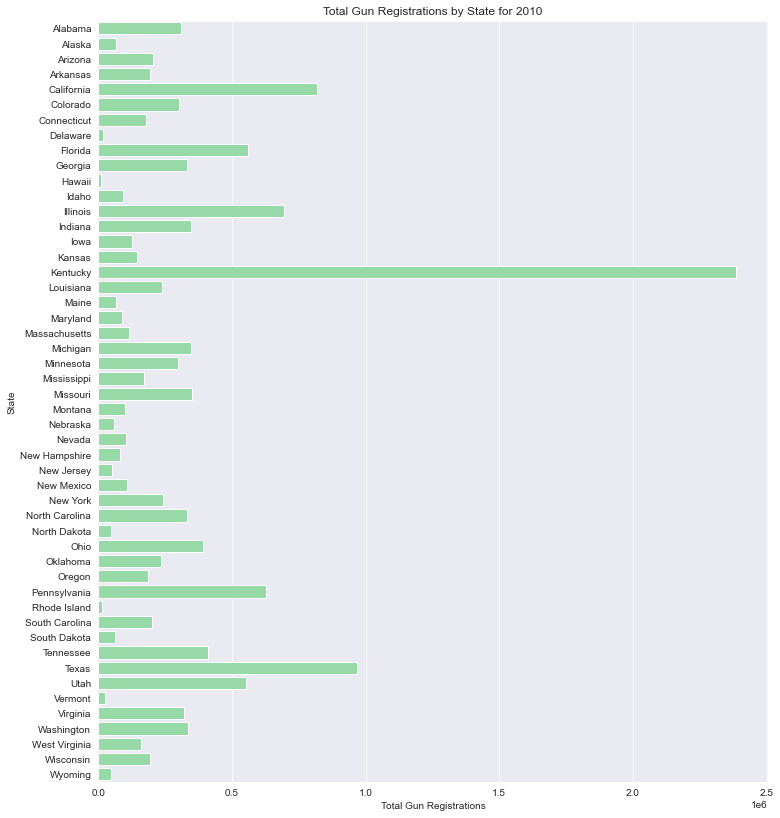

In [254]:
# build horizontal bar chart for 2010 gun totals
f, bar = plt.subplots(figsize=(12, 14))

sns.set_color_codes('pastel')
sns.barplot(x="totals_2010", y="state", data=df1, label="Total Gun Registrations by State for 2010", color="g");


bar.set( title="Total Gun Registrations by State for 2010", ylabel="State", xlabel="Total Gun Registrations");

***
The graph measures every half million. The commonwealth of Kentucky is a definate outlier, breaching way over 2 million. California and Texas do not even come near to matching.

On the smaller side of things, Hawaii and Rhode island live at the bottom of the scale. I must say, though, that those are small states, so I will later compare proportion to population later on.

Let's check out the distribution of the 2010 gun data.

In [319]:
# stat info for the total gun registrations for 2010
df1.totals_2010.describe()

count    5.000000e+01
mean     2.861985e+05
std      3.689456e+05
min      1.053300e+04
25%      8.912925e+04
50%      1.931225e+05
75%      3.348182e+05
max      2.385579e+06
Name: totals_2010, dtype: float64

***
These numbers seem a bit tricky, but I am seeing that the standerd deviation is around 369,000, the mean or average around 286,000, and the min and max at around 10,500 to 2,380,000 respectively.

lets look a histogram of the same data.

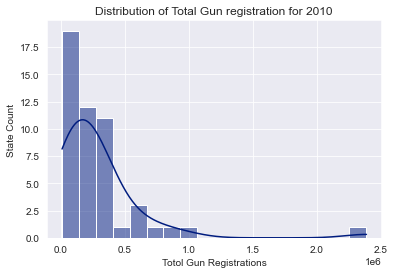

In [383]:
# create histogram for 2010 gun data
sns.set_color_codes("dark")
sns.color_palette('flare')
sns.histplot(data=df1, x="totals_2010", kde=True,color='b')
plt.xlabel('Totol Gun Registrations')
plt.ylabel('State Count')
plt.title('Distribution of Total Gun registration for 2010');


***
A good portion of the data lies at the bottom. Kentucky is definatly scewing the mean higher that what is accual center.

I am thinking the median may be a better represention of the true center of the data. From my ditribution chart I can see that my median (50%) is 198,000. That is significantly smaller than 286,000; by over 40%.

In [325]:
# calc and print percent diff
print((286-198)/198*100)

44.44444444444444


Because of the significantly larger, loan ourlier, the median is a better number to use for Our statistical center.

At this time I would like to create a list of the states that lie below the 25% percentile and above the 75% percentile.
I will compare this list to the 2016 gun data to see what state are on both list.

The 25% percentile is 89,129.25.

The 75% percentile is 334,818.2.

In [365]:
# query 2010 gun total under or equal to 25% percentil and diplay only state and totals_2010 columns
df10s=df1.query('totals_2010 <= 89129.25').iloc[:, np.r_[0,9]]

#sort asseneding order
df10s.sort_values('totals_2010')

,state,totals_2010
10,Hawaii,10533
38,Rhode Island,14835
7,Delaware,19240
44,Vermont,24276
33,North Dakota,47083
49,Wyoming,47709
29,New Jersey,50522
26,Nebraska,58283
40,South Dakota,63151
1,Alaska,65909


It seams to me that a majority of 25% percentile are New England states.
***

In [353]:
# query 2010 gun total over or equal to 75% percentil and diplay only state and totals_2010 columns
df10L=df1.query('totals_2010 >= 334818.2').iloc[:, np.r_[0,9]]

#sort asseneding order
df10L.sort_values('totals_2010')

,state,totals_2010
46,Washington,335342
13,Indiana,345650
21,Michigan,348200
24,Missouri,349672
34,Ohio,393250
41,Tennessee,411024
43,Utah,553134
8,Florida,559347
37,Pennsylvania,626677
12,Illinois,695300


A good portion of the 75% percentile are from the Midwest and Pacific states.
***

I will repeat the same process for the 2016 gun data.

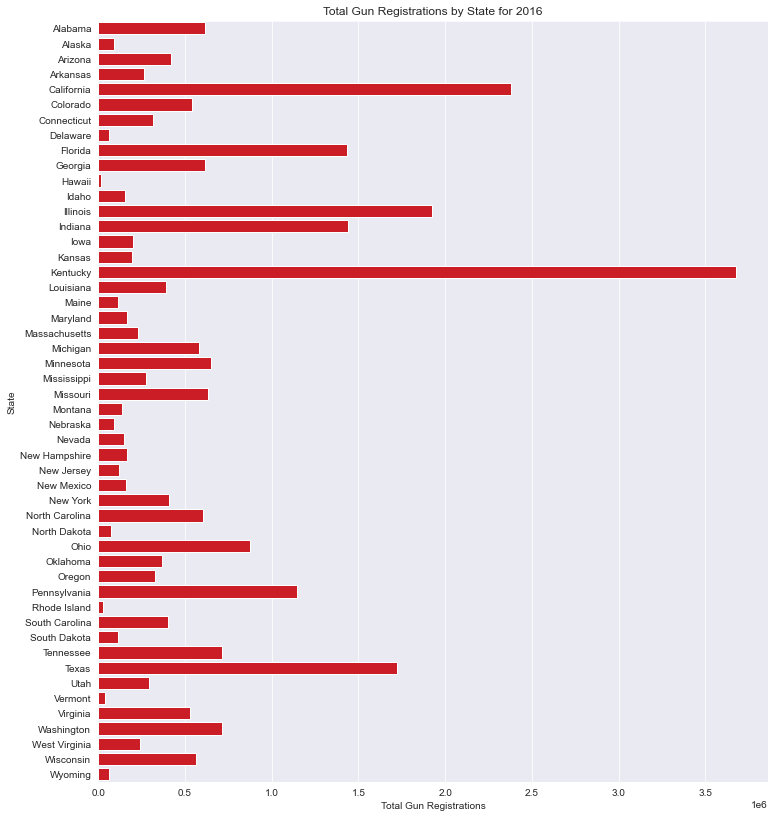

In [358]:
# build horizontal bar chart for 2016 gun totals
f, bar = plt.subplots(figsize=(12, 14))

sns.set_color_codes('bright')
sns.barplot(x="totals_2016", y="state", data=df1, label="Total Gun Registrations by State for 2016", color="r");


bar.set( title="Total Gun Registrations by State for 2016", ylabel="State", xlabel="Total Gun Registrations");

***
This graph measures in half millions. Kentuky is still in the lead with over 3.5 million registrations for the year 2016. Some other states have leaped fowared on the chart as well, like California and Illinois.

Rhode Island and Hawaii are still near the bottom, but again these have small populations compared to other states, so I cannot render any true insite untill I check gun to population proportions.

Overal gun registrations seem to have grown since 2010.

I will now check the 2016 distribution.

In [360]:
# stat info for the total gun registrations for 2010
df1.totals_2016.describe()

count    5.000000e+01
mean     5.481110e+05
std      6.826073e+05
min      1.668100e+04
25%      1.500798e+05
50%      3.212000e+05
75%      6.159565e+05
max      3.676847e+06
Name: totals_2016, dtype: float64

***
Here, am seeing that the standerd deviation is around 683,000, the mean or average around 548,000, and the min and max at around 16,600 to 3,677,000 respectively. That is deffinate growth from the 2010 data.

lets look a histogram of the same data.

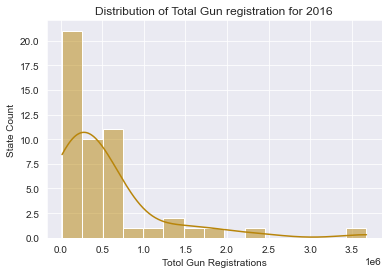

In [362]:
# create histogram for 2016 gun data
sns.set_color_codes("dark")
sns.color_palette('flare')
sns.histplot(data=df1, x="totals_2016", kde=True,color='y')
plt.xlabel('Totol Gun Registrations')
plt.ylabel('State Count')
plt.title('Distribution of Total Gun registration for 2016');


***
This gun graph line seems to slope more gently than the 2010 data, which could suggest that the ratio of guns to people may increased between the two years, but I have still to get that later.

The mean and the median are still far apart. Mean at about 548,000 and median at about 321,000; close to 70% difference. Because the mean accualy sits wtihin the bulck of the data, though, it may be a good measurement of center for this dataset.

In [363]:
# calc and print percent diff
print((548-321)/321*100)

70.7165109034268


***
Now, I will create a list of the states that lie below the 25% percentile and above the 75% percentile. I will then compare this list to the 2010 gun data to see what state are on both list.

The 25% percentile is 150,079.8.

The 75% percentile is 615,956.5.

In [366]:
# query 2016 gun total under or equal to 25% percentil and diplay only state and totals_2016 columns
df16s=df1.query('totals_2016 <= 150079.8').iloc[:, np.r_[0,12]]

#sort asseneding order
df16s.sort_values('totals_2016')

,state,totals_2016
10,Hawaii,16681
38,Rhode Island,27758
44,Vermont,39417
7,Delaware,59430
49,Wyoming,63594
33,North Dakota,72036
1,Alaska,87647
26,Nebraska,88663
18,Maine,111582
40,South Dakota,111921


The New England states still hold some gound for the 25% percentile.
***

In [367]:
# query 2016 gun total over or equal to 75% percentil and diplay only state and totals_2016 columns
df16L=df1.query('totals_2016 >= 615956.5').iloc[:, np.r_[0,12]]

#sort asseneding order
df16L.sort_values('totals_2016')

,state,totals_2016
0,Alabama,616947
24,Missouri,632319
22,Minnesota,651599
46,Washington,713996
41,Tennessee,714774
34,Ohio,875724
37,Pennsylvania,1143220
8,Florida,1435340
13,Indiana,1436725
42,Texas,1721726


Kentuky is still at the top with California right behind it. 

***
I am goin to compare the two years by merging the tables with an inner join, which only joins based on matching values.
Before I do that though, I have to change some columns name to make the merge work.

In [375]:
# change 2016 25% state column to temp
df16s.rename(columns={'state': 'temp'}, inplace=True)

# change 2016 75% state column to temp
df16L.rename(columns={'state': 'temp'}, inplace=True)

# print 2016 25% labels
print(df16s.columns);

# print 2016 75% labels
print(df16L.columns);

Index(['temp', 'totals_2016'], dtype='object')
Index(['temp', 'totals_2016'], dtype='object')


***
Ok, now I will merge the 25% into one table and the 75% into there own table as well.

In [468]:
# merge 25% table
df_25=df10s.merge(df16s, left_on='state', right_on='temp', how='inner')

#drop temp
df_25=df_25.drop(['temp'], axis =1)

#display merged data
print("States from both 25% percentile")
df_25

States from both 25% percentile


,state,totals_2010,totals_2016
0,Alaska,65909,87647
1,Delaware,19240,59430
2,Hawaii,10533,16681
3,Maine,65988,111582
4,Nebraska,58283,88663
5,New Jersey,50522,121853
6,North Dakota,47083,72036
7,Rhode Island,14835,27758
8,South Dakota,63151,111921
9,Vermont,24276,39417


We have 10 states here. Half of them are New England states.
***

In [382]:
# merge 75% table
df_75=df10L.merge(df16L, left_on='state', right_on='temp', how='inner')

#drop temp
df_75=df_75.drop(['temp'], axis =1)

#display merged data
print("States from both 75% percentile")
df_75

States from both 75% percentile


,state,totals_2010,totals_2016
0,California,816399,2377167
1,Florida,559347,1435340
2,Illinois,695300,1924070
3,Indiana,345650,1436725
4,Kentucky,2385579,3676847
5,Missouri,349672,632319
6,Ohio,393250,875724
7,Pennsylvania,626677,1143220
8,Tennessee,411024,714774
9,Texas,968071,1721726



Lot of midwestern and Pacific states. Pennslynavia breaks the New England trend to be in the 25% percentile.

What is consistant between the two tables in that I can see large jumps in counts from 2010 to 2016.
***

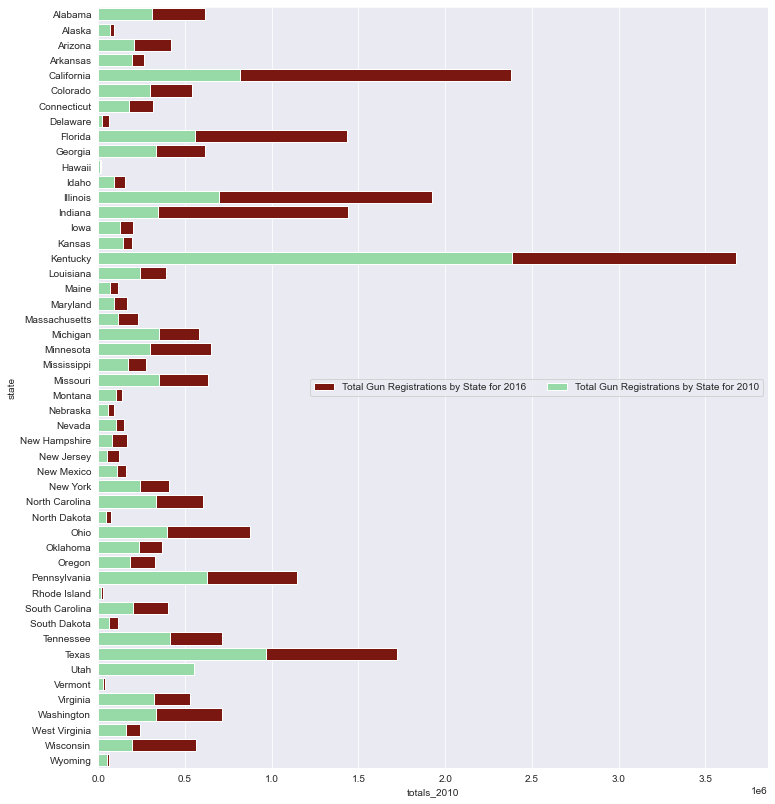

In [474]:
# create bar graph showoing both years
f, bar = plt.subplots(figsize=(12, 14))

# graph year 2016
sns.set_color_codes('dark')
sns.barplot(x="totals_2016", y="state", data=df1, label="Total Gun Registrations by State for 2016", color="r");

# graph year 2010
sns.set_color_codes('pastel')
sns.barplot(x="totals_2010", y="state", data=df1, label="Total Gun Registrations by State for 2010", color="g");

# include labels
bar.legend(ncol=2, loc="right", frameon=True)
bar.set( ylabel="", xlabel="Gun registration difference compared to population growth")
sns.set_color_codes('pastel')
sns.barplot(x="totals_2010", y="state", data=df1, label="Total Gun Registrations by State for 2010", color="g");

This ia general overview of what I have explored so far. I can clearly see from this chart the large growth that has taken place in gun purchease. Some states have even doubled there numbers.

>Kentucky is still way out there.

![Kentuky Derby](https://betoclock.com/wp-content/uploads/2014/12/horserace4.gif)
[Picture Source](https://betoclock.com/wp-content/uploads/2014/12/horserace4.gif)

***

Next part of the exploration is to acauly answer my question.

>What is the general growth of firearm checks in corelation to popluation growth?

To answer this question, I need to obtain the growth rate of the population, and then compare that to the growth rate of the fire are purchases.

Growth rate is measured as (New - Old)/Old * 100.  

I will begin by creating a new data set that is made of the extrated data.

In [403]:
#create df1 checkpoint to avoid data corruption
df2=df1.copy()

# create empty dataframe
df_pg=pd.DataFrame()

# calc and add population growth
df_pg['p_rate']=(df2.pop_est_2016-df2.pop_census_2010)/df2.pop_census_2010*100

# calc and add gun registration growth
df_pg['g_rate']=(df2.totals_2016-df2.totals_2010)/df2.totals_2010*100

#show pop mean growth rate
print('Average Population Growth Rate Between 2010 and 2016')
print(df_pg.p_rate.mean())

print('-'*29)

#show pop mean growth rate
print('Average Population Growth Rate Between 2010 and 2016')
print(df_pg.g_rate.mean())

print('-'*29)

#display top
df_pg.head()

Average Population Growth Rate Between 2010 and 2016
4.179850156092788
-----------------------------
Average Population Growth Rate Between 2010 and 2016
86.68544649106303
-----------------------------


,p_rate,g_rate
0,1.739890,99.913482
1,4.455480,32.981839
2,8.428420,102.028149
3,2.476762,38.948435
4,5.356383,191.177108


***
Off hand, this data does not seem right. it is show that the gun rate is 20 times higher that that of the population growth.

Lets graph the mean count of both years for both population and guns.

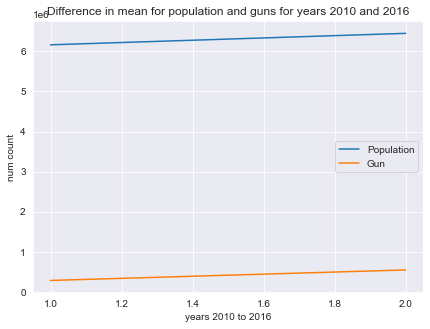

In [429]:
b = plt.subplots(figsize=(7, 5))

# set population axis
y1=np.array([df1.pop_census_2010.mean(), df1.pop_est_2016.mean()])
x1 = np.array([1,2])
plt.plot(x1,y1, label="Population")

# set gun axis
y2=np.array([df1.totals_2010.mean(), df1.totals_2016.mean()])
x2 = np.array([1,2])
plt.plot(x2,y2, label='Gun')

# set lables
plt.ylabel('num count')
plt.xlabel('years 2010 to 2016')
plt.title('Difference in mean for population and guns for years 2010 and 2016');
plt.legend()


plt.show();

Save for hight, there lines are almost identical in slope.

In [434]:
print('Difference Between Gun Year\'s Mean')
# calc gun mean year diff
print(df1.totals_2016.mean()- df1.totals_2010.mean())
      
print('-'*40)

print('Difference Between Population Year\'s Mean')
#calc pop mean year diff
print(df1.pop_est_2016.mean()- df1.pop_census_2010.mean())


Difference Between Gun Year's Mean
261912.45999999996
----------------------------------------
Difference Between Population Year's Mean
285800.0800000001



The numbers are rather close.
***
I going switch gears now and test the difference in proportion of guns to population.

For this I will calc the proportions for each year and then compare the two.

>To find to proportion, N1 is x% of N2 when (N2 * 100) / N2

>Where N1 = guns and N2 = population

In [439]:
# create an empty dataframe
df_pr=pd.DataFrame()

# import state
df_pr['state']=df2.state

# calc in 2010 proportion
df_pr['prop_2010']=(df2.totals_2010 * 100) / df2.pop_census_2010

# calc in 2016 proportion
df_pr['prop_2016']=(df2.totals_2016 * 100) / df2.pop_est_2016

# import state
df_pr['state']=df2.state
# display stats for dataframe
df_pr.describe()

,prop_2010,prop_2016
count,50.000000,50.000000
mean,6.012477,9.769509
std,7.691205,11.192784
min,0.574639,1.167682
25%,3.428734,6.087192
50%,4.977225,8.375297
75%,6.049586,10.232564
max,54.975568,82.868347


Theses stats of my new table seen to indicate that the gun rate is indead higher than I thought.

Lets diplay a joint graph.

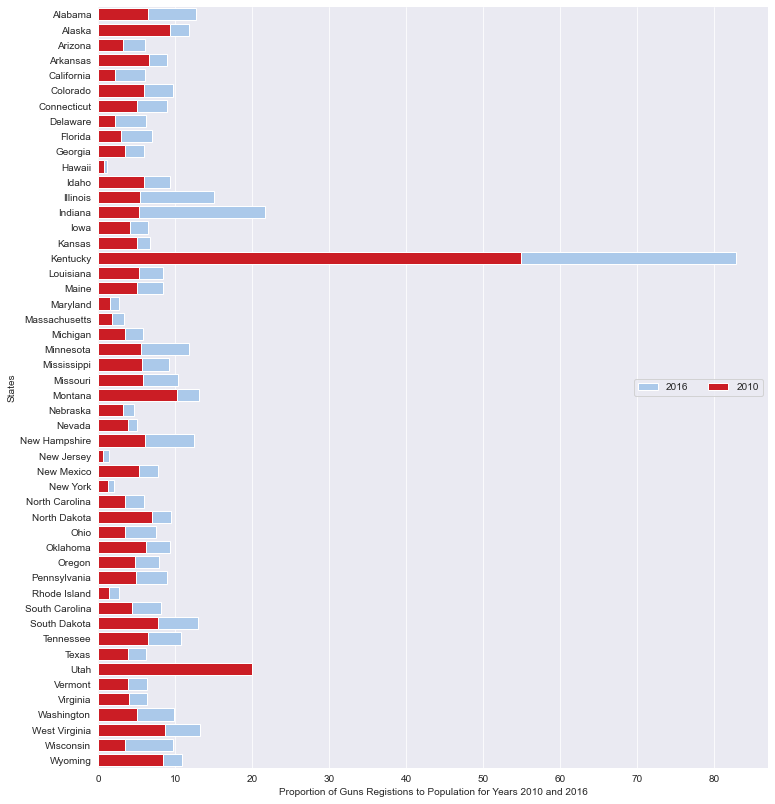

In [448]:
f, b = plt.subplots(figsize=(12, 14))

sns.set_color_codes('pastel')
sns.barplot(x="prop_2016", y="state", data=df_pr, label="2016", color="b");

sns.set_color_codes('bright')
sns.barplot(x="prop_2010", y="state", data=df_pr, label="2010", color="r");

b.legend(ncol=2, loc="right", frameon=True)
b.set(ylabel="States", xlabel="Proportion of Guns Registions to Population for Years 2010 and 2016")
sns.despine(left=True, bottom=True);

***
Interesting. There is a definate indication of proportion increase, with Kentuky again taking the lead by a major margin.

I am going to create some new table holding the above 75% and below 25% percentiles, like I did for the general gun anlysis.

In [458]:
# query 2010 gun proportion under or equal to 25% percentil and diplay only state and prop_2010 columns
df10ps=df_pr.query('prop_2010 <= 3.428734').iloc[:, np.r_[0,1]]

# sort assending
df10ps.sort_values('prop_2010')


,state,prop_2010
29,New Jersey,0.574639
10,Hawaii,0.774314
31,New York,1.246226
38,Rhode Island,1.408912
19,Maryland,1.526936
20,Massachusetts,1.770118
7,Delaware,2.142692
4,California,2.191409
8,Florida,2.974523
26,Nebraska,3.191256


In [460]:
# query 2010 gun proportion under or equal to 75% percentil and diplay only state and prop_2010 columns
df10pL=df_pr.query('prop_2010 >= 6.049586').iloc[:, np.r_[0,1]]

# sort assending
df10ps.sort_values('prop_2010')

,state,prop_2010
28,New Hampshire,6.072341
35,Oklahoma,6.234888
0,Alabama,6.456036
41,Tennessee,6.476595
3,Arkansas,6.565376
33,North Dakota,7.000242
40,South Dakota,7.756250
49,Wyoming,8.462539
47,West Virginia,8.610310
1,Alaska,9.279703


In [462]:
# query 2016 gun proportion under or equal to 25% percentil and diplay only state and prop_2016 columns
df16ps=df_pr.query('prop_2016 <= 6.087192').iloc[:, np.r_[0,2]]

# sort assending
df16ps.sort_values('prop_2016')

,state,prop_2016
10,Hawaii,1.167682
29,New Jersey,1.362328
31,New York,2.049967
38,Rhode Island,2.627539
19,Maryland,2.748582
20,Massachusetts,3.320895
26,Nebraska,4.649062
27,Nevada,5.033642
21,Michigan,5.837908
32,North Carolina,5.927442


In [465]:
# query 2016 gun proportion under or equal to 75% percentil and diplay only state and prop_2016 columns
df16pL=df_pr.query('prop_2016 >= 10.232564').iloc[:, np.r_[0,2]]

# sort assending
df16pL.sort_values('prop_2016')

,state,prop_2016
24,Missouri,10.377794
41,Tennessee,10.746552
49,Wyoming,10.861467
22,Minnesota,11.804432
1,Alaska,11.813952
28,New Hampshire,12.373735
0,Alabama,12.685769
40,South Dakota,12.932056
25,Montana,13.077639
47,West Virginia,13.235199


***
I am now goin to merge these table with an inner join to see what states persist on both tables.

In [466]:
# change 2016 25% state column to temp
df16ps.rename(columns={'state': 'temp'}, inplace=True)

# change 2016 75% state column to temp
df16pL.rename(columns={'state': 'temp'}, inplace=True)

# print 2016 25% labels
print(df16ps.columns);

# print 2016 75% labels
print(df16pL.columns);

Index(['temp', 'prop_2016'], dtype='object')
Index(['temp', 'prop_2016'], dtype='object')


In [469]:
# merge 25% table
df_p25=df10ps.merge(df16ps, left_on='state', right_on='temp', how='inner')

#drop state
df_p25=df_p25.drop(['state'], axis =1)

#display merged data
print("States from both 25% percentile")
df_p25

States from both 25% percentile


,prop_2010,temp,prop_2016
0,3.223409,Arizona,6.005984
1,2.191409,California,6.056474
2,0.774314,Hawaii,1.167682
3,1.526936,Maryland,2.748582
4,1.770118,Massachusetts,3.320895
5,3.191256,Nebraska,4.649062
6,0.574639,New Jersey,1.362328
7,1.246226,New York,2.049967
8,1.408912,Rhode Island,2.627539


In [470]:
# merge 75% table
df_p75=df10pL.merge(df16pL, left_on='state', right_on='temp', how='inner')

#drop state
df_p75=df_p75.drop(['state'], axis =1)

#display merged data
print("States from both 75% percentile")
df_p75

States from both 75% percentile


,prop_2010,temp,prop_2016
0,6.456036,Alabama,12.685769
1,9.279703,Alaska,11.813952
2,54.975568,Kentucky,82.868347
3,10.217664,Montana,13.077639
4,6.072341,New Hampshire,12.373735
5,7.756250,South Dakota,12.932056
6,6.476595,Tennessee,10.746552
7,8.610310,West Virginia,13.235199
8,8.462539,Wyoming,10.861467


***
I kept the temp table because I now want merge these tabes with the percentile tables created earlier in the anlysis for general gan data.

In [471]:
# merge 25% table
df25=df_25.merge(df_p25, left_on='state', right_on='temp', how='inner')

#drop temp
df25=df25.drop(['temp'], axis =1)

#display merged data
print("States from All 25% percentile")
df25

States from All 25% percentile


,state,totals_2010,totals_2016,prop_2010,prop_2016
0,Hawaii,10533,16681,0.774314,1.167682
1,Nebraska,58283,88663,3.191256,4.649062
2,New Jersey,50522,121853,0.574639,1.362328
3,Rhode Island,14835,27758,1.408912,2.627539


In [473]:
# merge 75% table
df75=df_75.merge(df_p75, left_on='state', right_on='temp', how='inner')

#drop temp
df75=df75.drop(['temp'], axis =1)

#display merged data
print("States from All 75% percentile")
df75

States from All 75% percentile


,state,totals_2010,totals_2016,prop_2010,prop_2016
0,Kentucky,2385579,3676847,54.975568,82.868347
1,Tennessee,411024,714774,6.476595,10.746552


***
There seems to a major growth in firearms between the years 2010 and 2016. As seen the charts above, Kentcky and Tennessee quite high on theese list. Hawaii, and the other do not seam to share the same passion that the other two state do. This a little different that what I expected the data to show. I was enticipating a more even growth rate.
***
### ۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝₪۝
***

### Research Question 2:  What is the correlation of age groups and firearms checks?

This question is not that difficult to explore. For each year I have two age groups; under 18 and over 65.
For each of the years age groups I will create a scatter plot to test the correlation. If interesting data does show during the analysis I may side track on it to explore it a little further.

****
Lets begin with the year 2010 for people under the age of 18.

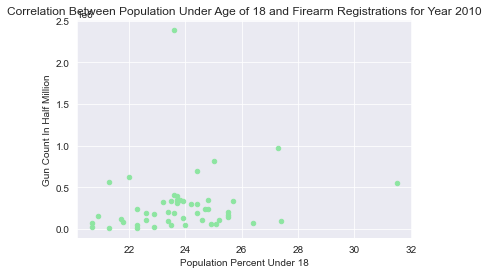

In [489]:

df1.plot.scatter(x="pop<18_%_2010", y="totals_2010",color="g")
plt.xlabel('Population Percent Under 18')
plt.ylabel('Gun Count In Half Million')
plt.title('Correlation Between Population Under Age of 18 and Firearm Registrations for Year 2010');


There is a slight correlation, but that my be due to general growth.
***
Next chart is for the population over 65.

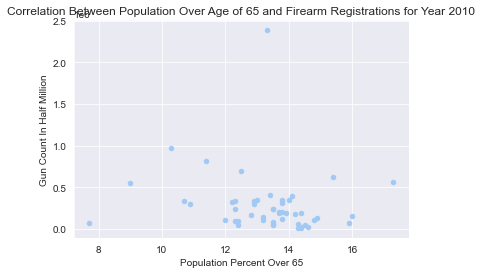

In [490]:
df1.plot.scatter(x="pop>65_%_2010", y="totals_2010",color="b")
plt.xlabel('Population Percent Over 65')
plt.ylabel('Gun Count In Half Million')
plt.title('Correlation Between Population Over Age of 65 and Firearm Registrations for Year 2010');

I detect a slight hint of a negative slope, but it is only a guesss.
***
Now that I have seen 2010, lets see 2016.

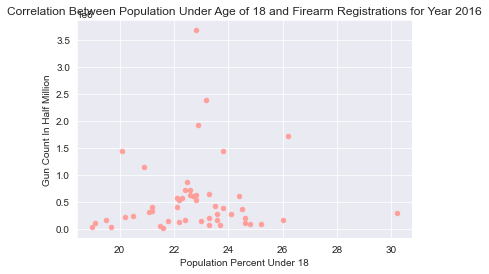

In [491]:
df1.plot.scatter(x="pop<18_%_2016", y="totals_2016",color="r")
plt.xlabel('Population Percent Under 18')
plt.ylabel('Gun Count In Half Million')
plt.title('Correlation Between Population Under Age of 18 and Firearm Registrations for Year 2016');

That has a similer upward trend to 2010 version, but it is a litte more spread out.
***
Lets finish with the population over 65 for 2016

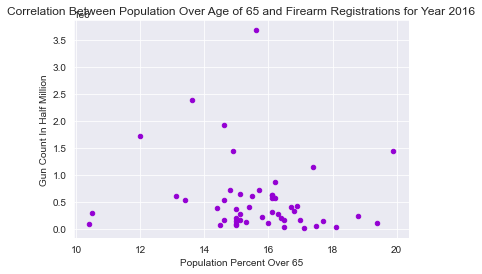

In [496]:
df1.plot.scatter(x="pop>65_%_2016", y="totals_2016",color="darkviolet")
plt.xlabel('Population Percent Over 65')
plt.ylabel('Gun Count In Half Million')
plt.title('Correlation Between Population Over Age of 65 and Firearm Registrations for Year 2016');

This chart is realy spread out. There is no strong correlation on this one.
***
The chart correlations are not definate, but they do show some direction, especialy for the group under 18.
***

***
# ۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞
<a id='conclusions'></a>
## Conclusions

I definately have pulled some tidbits from my exploring. For one the firearms growth rate was far higher that I anticipated. But again, 2016 was an election year. Anything seems possible during politioncal seasons. People may have fealt threatend by the atmosphere and decided to purchase a gun. Or it just may be a natural growth rate. The gun counts are much smaller that the population counts, so an increase on the gun data will have a far more noticable impact than on the population data.

From what I have seen. If one is super gun fan, I would recommend Blue Mountains of Tennessee and Kentucky. If, on the other hand person would like to live a less volatile evnironemnt, try balmy Hawaii, warm Nebraska, breasy New Jersey, or even the small terra of Rhode Island. The options are not so bad.

I noticed quite a few New England states in the lower percentiles. This may be due to culteral difference and historic backround. Western states, on the other hand, enjoyed a good portion of the higher percentils of gun ownership.

Age seems to a very minmal correlation to firearms purchases. The younger generation seems to correlate most with a positive slope, but still stlight. Population growth can mean more children, so it would be surprising if gun purchases grew as well witht the general population. As for the reired Age group, as far as I can see, there is little correlation. Retired people can prety much choose where they want to live these days and often move near children. Both age groups seemed to majorly hang out in the same population percentage range, which would limit the correlation with the firearms.

My data is incomplete. I wish I had the years inbetween 2010 and 2016 for population. I could provide some firearms counts for that range, but they do not have much meaning with populaton compartison. As was shown with some states, they had high register counts, but low proportions to population overall. Two towns may have 100 guns, but one will have a proportion of 1 to 2 people and the other a proportion of 1 to 20 people because of higher population. 

More varialables are neaded for firearm comparison than just population. I did not have any data percentatage based on gender. The race, and education variables where grouped in a five year span, elimiating some of the finite data that would provide deaper insite. I could consider the housing units, and firms data. I am sure there is more to the firearms counts that just population. Who knows? Maybe there is a correlation to high gun purchaces and horse derby racing.

***
***
![DataAnalytics](http://images.clipartpanda.com/analysis-clipart-canstock4557367.jpg)
[Picture Sourse](http://www.clipartpanda.com/categories/analytics-clip-art)


# ۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞∩۞

List of access soursces
* https://datagy.io/pandas-select-columns/
* https://datagy.io/pandas-select-columns/
* https://sparkbyexamples.com/pandas/pandas-drop-columns-by-index/
* https://sparkbyexamples.com/pandas/pandas-drop-rows-from-dataframe/
* https://www.statology.org/pandas-select-column-by-index/
* https://sparkbyexamples.com/pandas/pandas-add-header-row-to-dataframe/
* https://numpy.org/doc/stable/reference/generated/numpy.r_.html
* https://stackoverflow.com/questions/57450475/convert-a-decimal-column-in-pandas-into-a-float-column#57451388
* https://ipython.readthedocs.io/en/stable/interactive/magics.html
* https://stackoverflow.com/questions/45393123/adding-calculated-column-in-pandas
* https://www.easytweaks.com/create-python-scatter-plot/
* https://seaborn.pydata.org/examples/regression_marginals.html
* https://seaborn.pydata.org/examples/part_whole_bars.html
* https://towardsdatascience.com/how-to-use-loc-in-pandas-49ed348a4117

